# Mod 4 Project - Starter Notebook


In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.5.13 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import functions_mod4proj as ji
help(ji)

Help on module functions_mod4proj:

NAME
    functions_mod4proj

FUNCTIONS
    get_model_metrics(true, preds, train, explain_U=False)
    
    get_train_test_split_index(ts, TEST_SIZE=0.2)
    
    make_dateindex(df_to_add_index, index_col='Month', index_name='date', drop=True, freq=None, verbose=True)
    
    melt_data(df)
    
    meta_grid_search(ts, TEST_SIZE=0.2, model_kws={}, verbose=True, return_kws=False)
    
    plotly_timeseries(df, x='datetime', y='MeanValue', color='RegionID', line_group='State')
    
    stationarity_check(TS, plot=True, col=None)
        From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    
    thiels_U(ys_true=None, ys_pred=None, display_equation=True, display_table=True)
        Calculate's Thiel's U metric for forecasting accuracy.
        Accepts true values and predicted values.
        Returns Thiel's U

FILE
    /Users/ja



This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [3]:
pd.set_option('display.max_columns',0)
df=pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,...,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,...,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,...,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,114700,115000,115000,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Preprocessing

In [4]:
df = ji.melt_data(df)
df = ji.make_dateindex(df,index_col='Month',index_name='date')
df

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=3744704, freq=None)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
date,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
2018-04-01,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,2018-04-01,209300.0
2018-04-01,59107,3293,Woodstock,NH,Claremont,Grafton,14720,2018-04-01,225800.0
2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,2018-04-01,133400.0


## Picking Sub-Set of Data

In [31]:
## Picking a state
state = 'NY'
start_year = '2008'

df_state = df.loc[df['State']==state].loc['2010':]
df_state

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
date,,,,,,,,,
2010-01-01,61807,10467,New York,NY,New York,Bronx,7,2010-01-01,328100.0
2010-01-01,62037,11226,New York,NY,New York,Kings,11,2010-01-01,531900.0
2010-01-01,62087,11375,New York,NY,New York,Queens,13,2010-01-01,679200.0
2010-01-01,62045,11235,New York,NY,New York,Kings,14,2010-01-01,507200.0
2010-01-01,61625,10011,New York,NY,New York,New York,21,2010-01-01,6785500.0
...,...,...,...,...,...,...,...,...,...
2018-04-01,62430,12153,Sand Lake,NY,Albany,Rensselaer,14664,2018-04-01,207300.0
2018-04-01,62433,12156,Schodack,NY,Albany,Rensselaer,14694,2018-04-01,199400.0
2018-04-01,62599,12480,Shandaken,NY,Kingston,Ulster,14703,2018-04-01,163700.0


In [32]:
df_state['RegionName'].nunique()

1015

In [33]:
df_state['Metro'].value_counts()

New York       41074
Rochester       8100
Albany          7894
Syracuse        6500
Buffalo         5788
Utica           3400
Kingston        2704
Binghamton      2352
Glens Falls     2100
Jamestown       2082
Olean           1700
Watertown       1546
Oneonta         1500
Plattsburgh     1500
Hudson          1500
Corning         1400
Ogdensburg      1400
Auburn          1200
Elmira           900
Ithaca           800
Cortland         500
Name: Metro, dtype: int64

In [34]:
df_metro = df_state.loc[df_state['Metro']=='Albany']
df_metro

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
date,,,,,,,,,
2010-01-01,62453,12180,Troy,NY,Albany,Rensselaer,495,2010-01-01,162300.0
2010-01-01,62370,12065,Clifton Park,NY,Albany,Saratoga,808,2010-01-01,256600.0
2010-01-01,62810,12866,Saratoga Springs,NY,Albany,Saratoga,924,2010-01-01,272100.0
2010-01-01,62334,12020,Milton,NY,Albany,Saratoga,2072,2010-01-01,214200.0
2010-01-01,62473,12203,Albany,NY,Albany,Albany,2729,2010-01-01,188700.0
...,...,...,...,...,...,...,...,...,...
2018-04-01,62357,12052,Grafton,NY,Albany,Rensselaer,14261,2018-04-01,162500.0
2018-04-01,62372,12067,New Scotland,NY,Albany,Albany,14308,2018-04-01,222900.0
2018-04-01,62449,12175,Summit,NY,Albany,Schoharie,14646,2018-04-01,128600.0


# Step 3: EDA and Visualization

In [35]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# mpl.rc('font', **font)

# # NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [36]:
from plotly import express as px
import plotly.graph_objects as go

In [37]:
df_metro.groupby(['RegionName',pd.Grouper(freq='MS')]).mean()['MeanValue']

RegionName  date      
12009       2010-01-01    225500.0
            2010-02-01    226100.0
            2010-03-01    226700.0
            2010-04-01    227600.0
            2010-05-01    228300.0
                            ...   
13459       2017-12-01    106400.0
            2018-01-01    106300.0
            2018-02-01    106200.0
            2018-03-01    106600.0
            2018-04-01    106900.0
Name: MeanValue, Length: 7894, dtype: float64

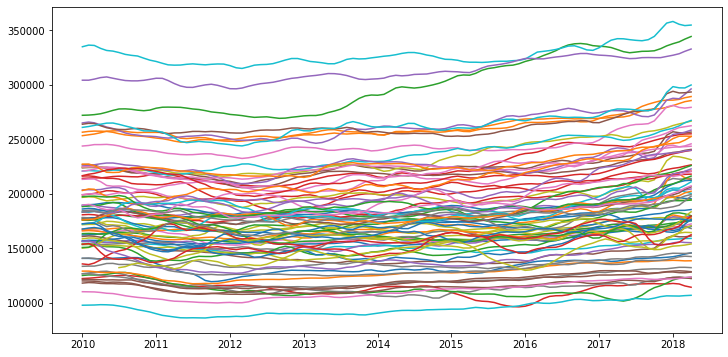

In [50]:
mpl.rcParams['figure.figsize']=12,6
fig,ax=plt.subplots()
for region in list(df_metro['RegionName'].unique()):
    ax.plot(df_metro.groupby('RegionName').get_group(region)['MeanValue'],
           label=region)
# ax.legend()


In [42]:
# from plotly.io import show

In [45]:
# mpl.rcParams['figure.figsize']=12,6
# fig=go.Figure()
# for region in list(df_metro['RegionName'].unique()):
#     px.line(df_metro.groupby('RegionName').get_group(region)['MeanValue'])#


In [48]:
ts = df_metro.loc[df_metro['RegionName']==12211]['MeanValue']
ts

date
2010-01-01    265100.0
2010-02-01    265900.0
2010-03-01    265200.0
2010-04-01    263300.0
2010-05-01    261300.0
                ...   
2017-12-01    286000.0
2018-01-01    287700.0
2018-02-01    287300.0
2018-03-01    291400.0
2018-04-01    296300.0
Name: MeanValue, Length: 100, dtype: float64

### MODELING

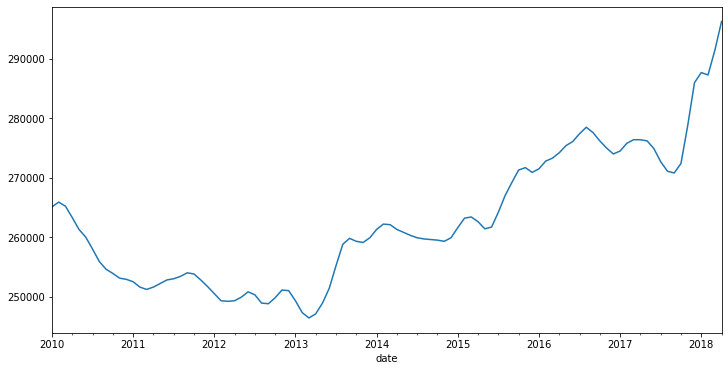

In [51]:
ts.plot()

pm.auto_arima args:
{'start_p': 0, 'start_q': 0, 'start_P': 0, 'start_Q': 0, 'max_p': 5, 'max_q': 6, 'max_P': 5, 'max_Q': 5, 'max_D': 3, 'suppress_warnings': True, 'stepwise': False, 'trace': False, 'm': 6, 'seasonal': True, 'with_intercept': True, 'stionarity': False}


//anaconda3/envs/learn-env/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning:

Unable to fit ARIMA for order=(0, 2, 0) seasonal_order=(0, 0, 5, 6); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -638.283
Date:                Tue, 24 Dec 2019   AIC                           1282.567
Time:                        20:00:21   BIC                           1289.637
Sample:                             0   HQIC                          1285.397
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.9364     87.309      0.240      0.810    -150.186     192.059
ar.L1          0.0214      0.029      0.734      0.463      -0.036       0.078
sigma2      6.528e+05   9.04e+04      7.222      0.000    4.76e+05     8.3e+05
===================================================================================
Ljung-Box (Q):                      121.09   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               2.66   Skew:                            -0.30
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



,Metric,Value
0,R^2,-2.310579
1,RMSE,12706.684385
2,Thiel's U,4.638217


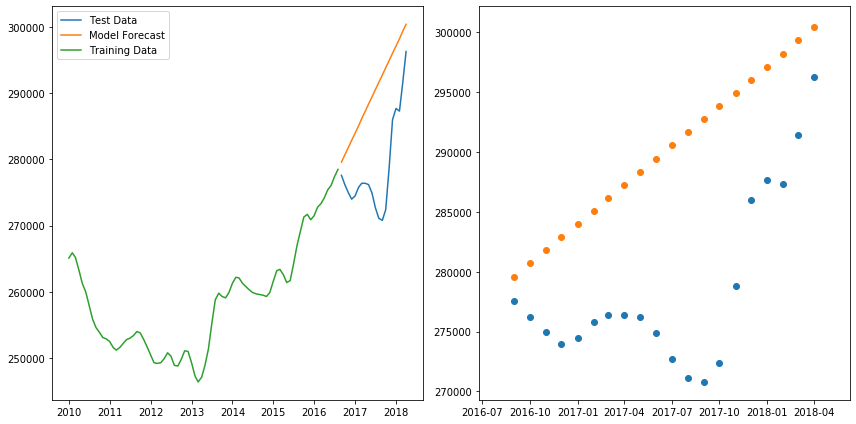

In [49]:
ji.meta_grid_search(ts)

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results